# Graphs

The word _graph_ has some overloaded meanings. Many might think of a graph as a _plot_, something you might use a _graphing_ calculator to produce. In this context, _graph_ instead refers to a mathematical description of a number of _things_ that are related to each other. For example, social networks, computer networks, road networks and molecules are often represented as _graphs_.

Formally we represent these _things_ as nodes, and their relations as _edges_. Typically, in a social network, each person is a node, and each freindship is an edge. An edge could also represent a message that was sent, or reactions to a post, etc. In a computer network, the nodes are often routers, and the edges the physical connections (cables) between them. And in a road network, one could model each intersection as a node, and the roads connecting them as edges. 

In a graph, both nodes and edges can have features. In the previous notebook we learned how to represent features in code. This will come in handy later in this notebook when we tie it together. But first, we'll have a look at how to represent graphs themselves in code.

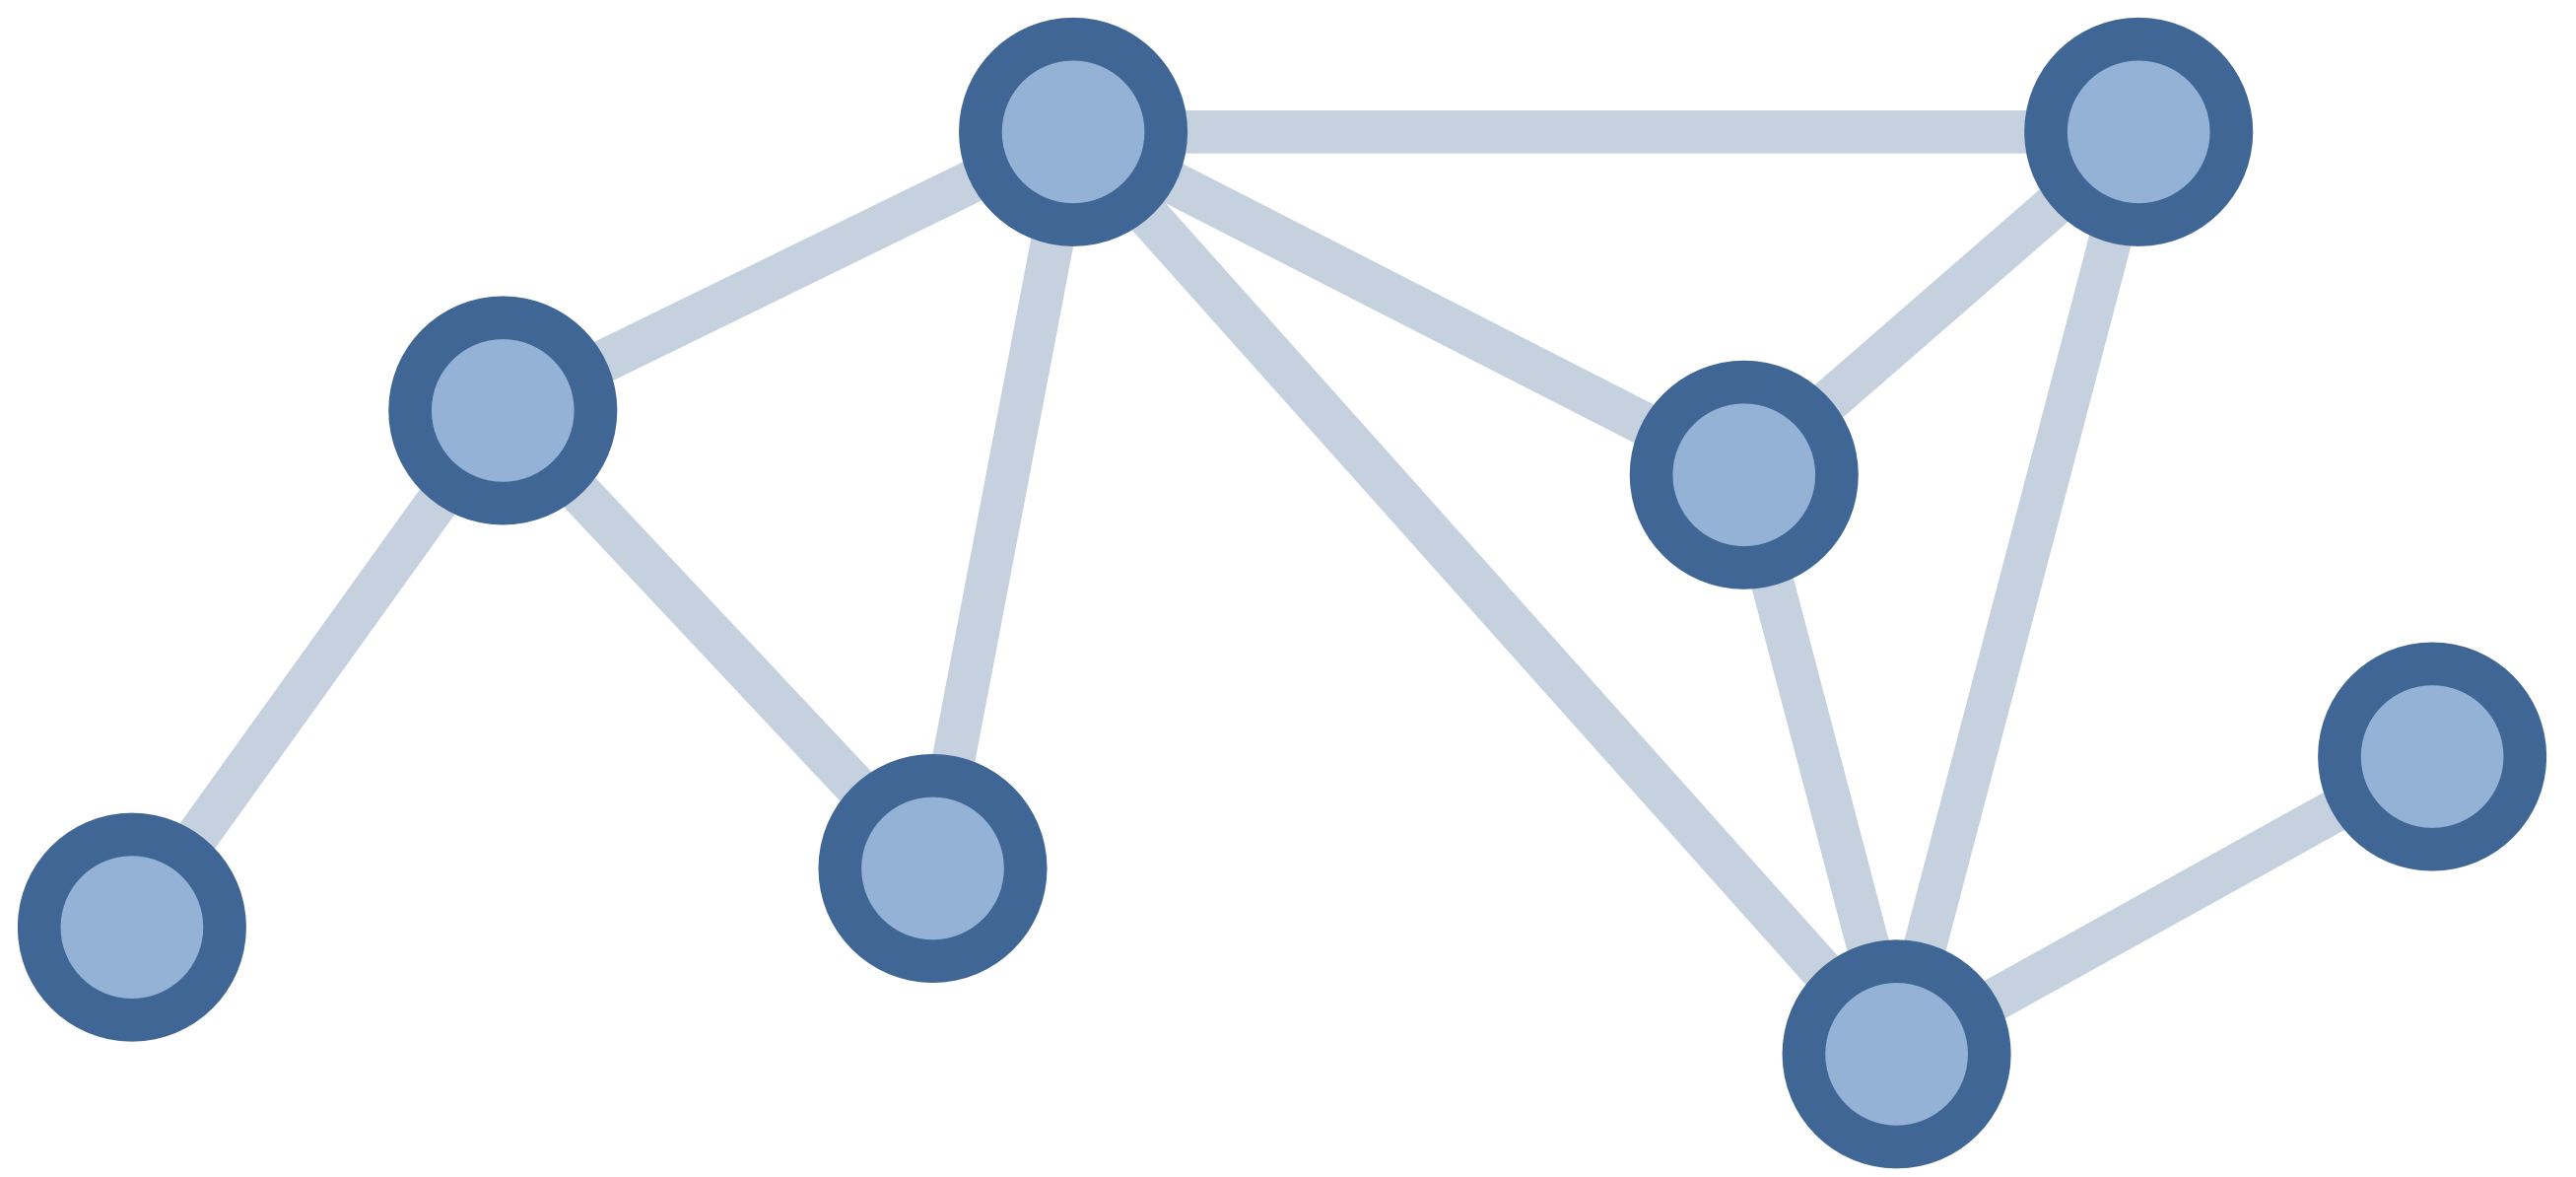


## Graph property: Directedness

One basic distinction we make on graphs are _undirected_ or _directed_. In the case of a directed graph, the relationships represnted by the edges are not symmetrical. An example of this would be a follower graph from social media. A user Alice can follow another user Bob (represented by and edge between the user nodes), but this does not mean that Bob necessarily follows Alice.
In a undirected graph, the relationship is symmetrical, for example if Alice is a friend of Bob, Bob is also a friend of Alice.

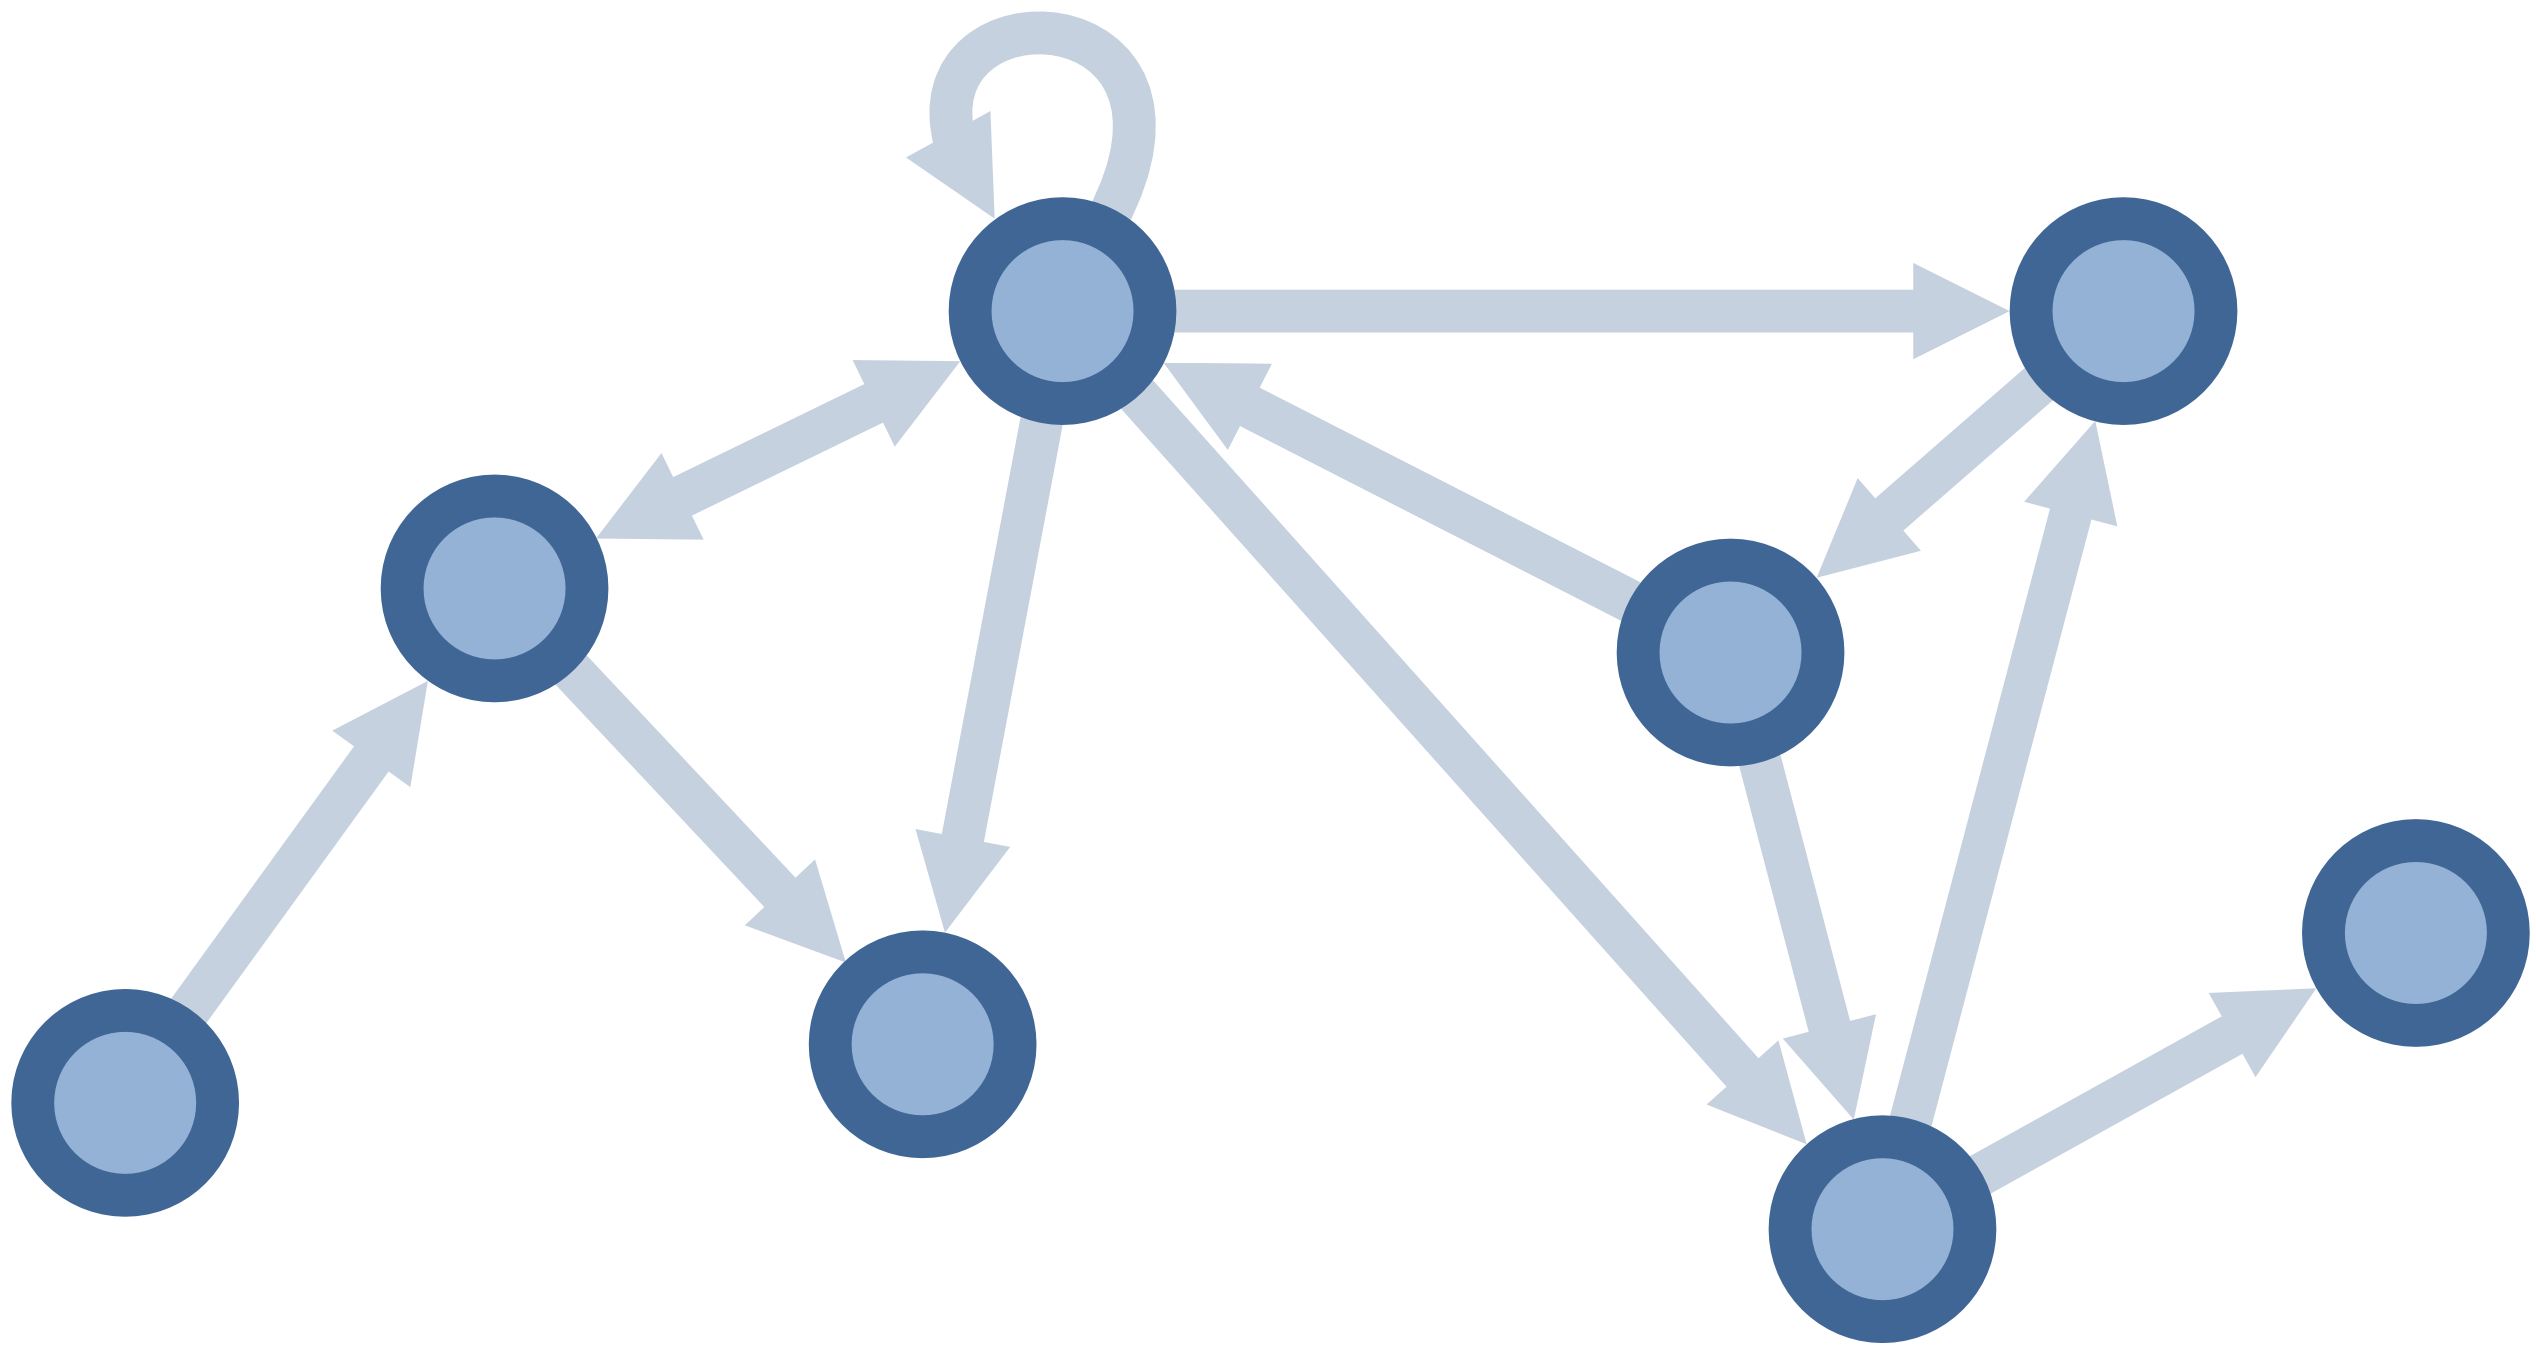

## Representing graphs in code
A graph is generally defined as a pair of sets, a set of nodes and a set of edges between them $G = (N, E)$. To be able to tell nodes apart, we need to assign a unique identifier to each node, which we'll refer to as an index.

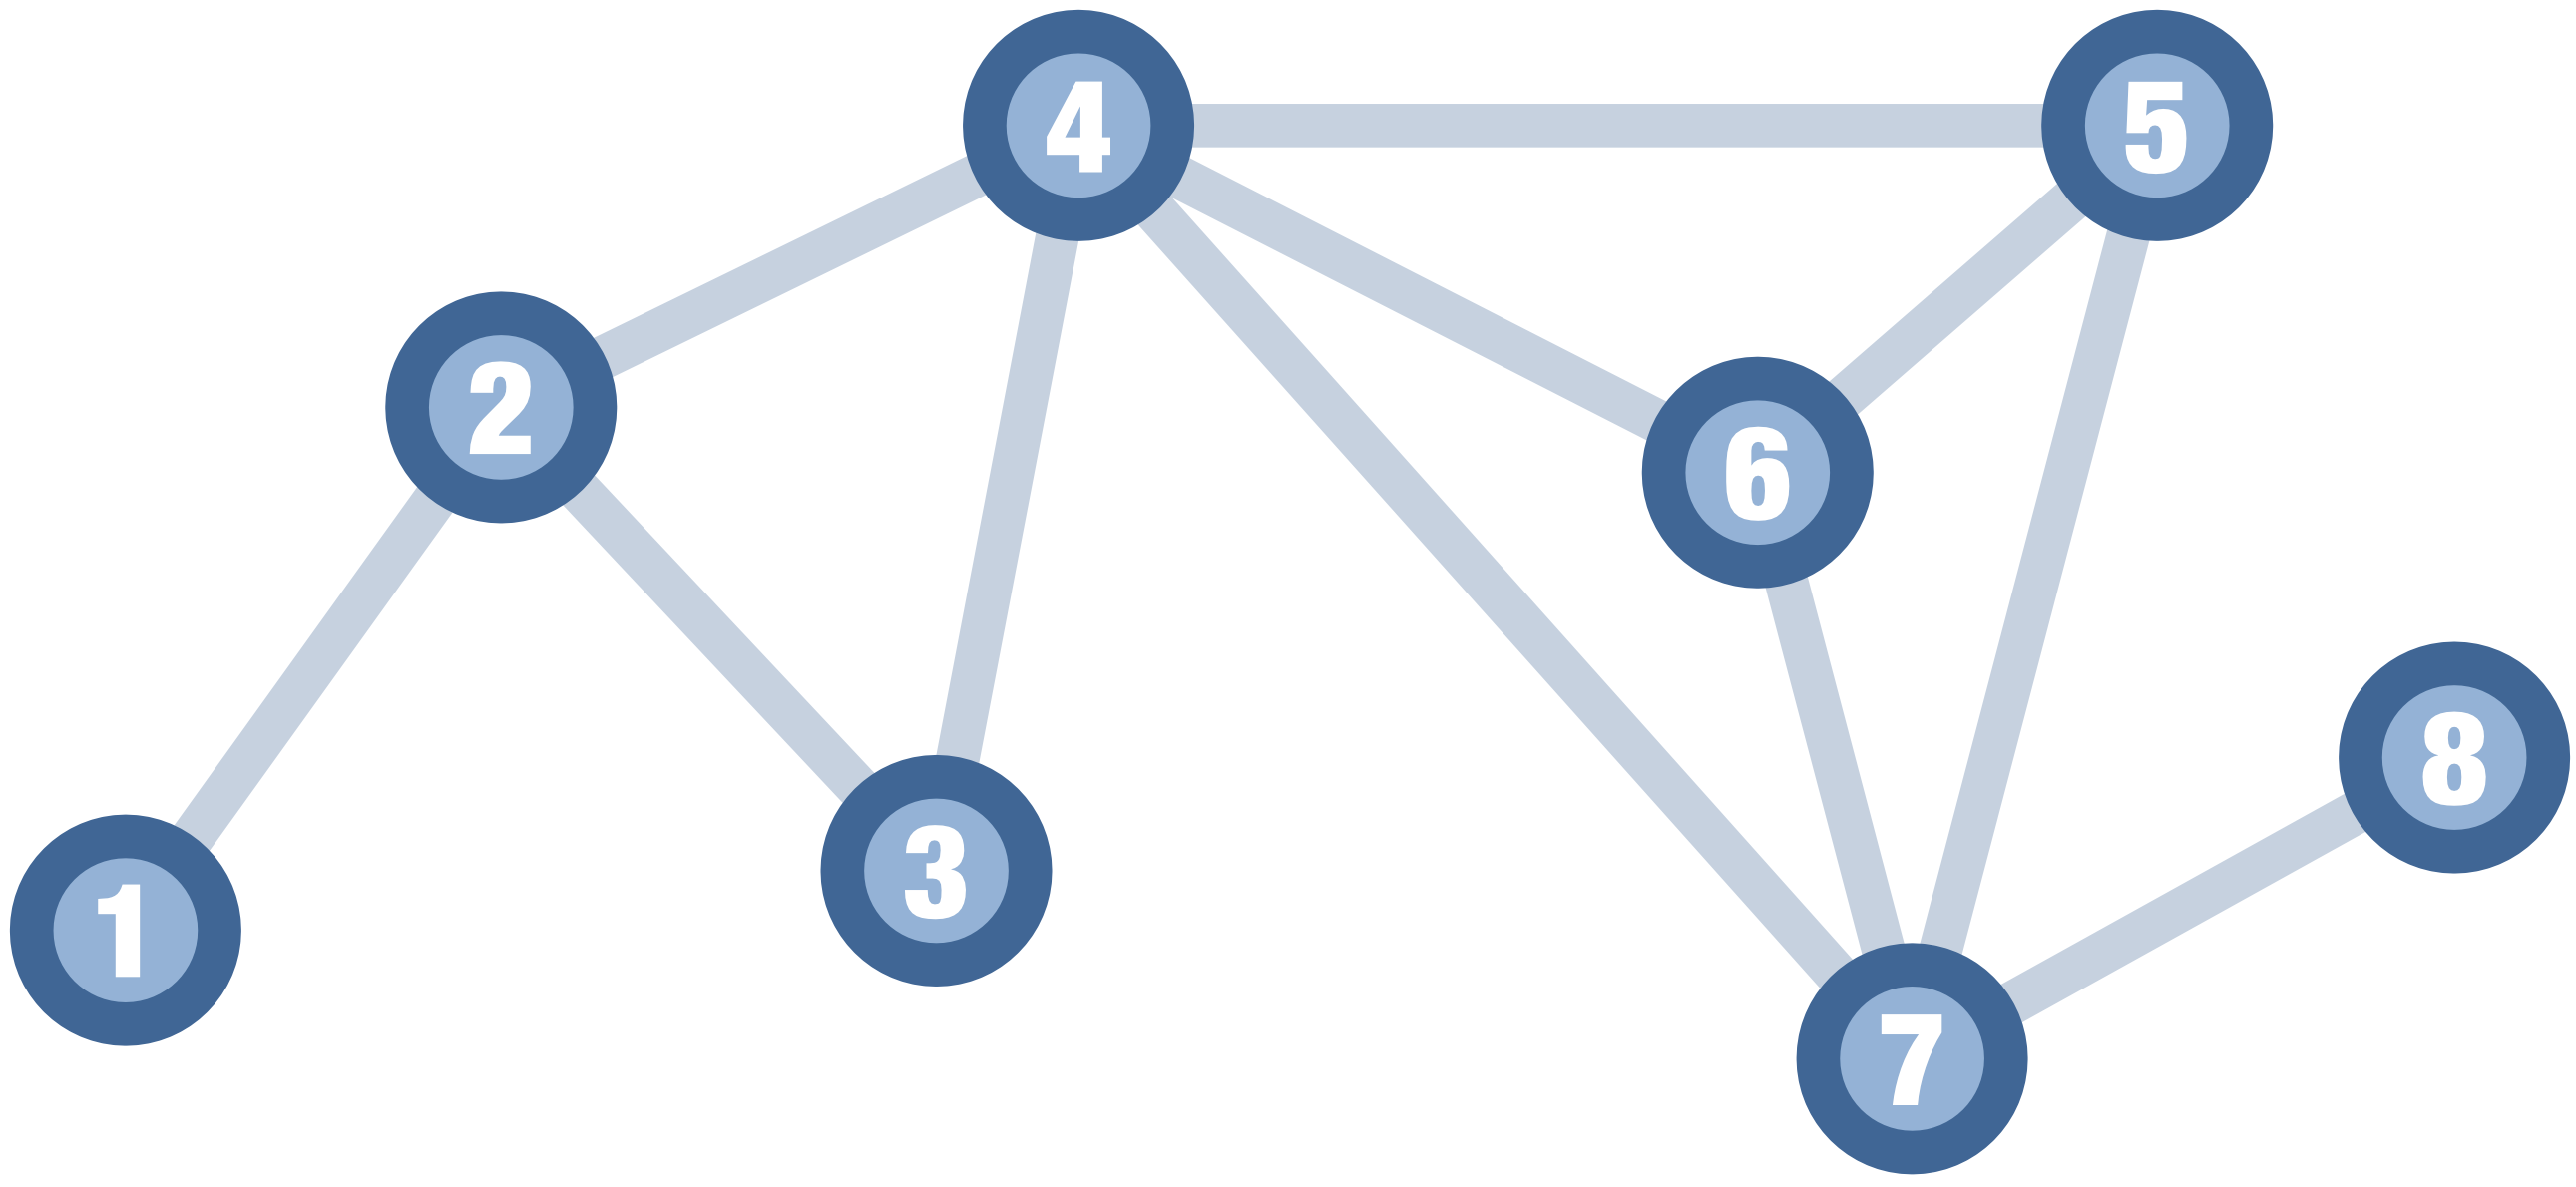

Each edge is defined by the nodes it connects, and is therefore represented as a pair (or tuple) of nodes. If the graph is explicitly undirected, the order of the nodes in the pair is not important, but in a directed graph the edge $(u, v)$ is different from the edge $(v, u)$. A common way of representing graphs is to always assume that it's a directed graph, and to represent undirected graphs by adding the edge in both directions. While this might seem wasteful, it often allows algorithms to be applicable to both directed and undirected graphs without modification.

A simple representation of a directed graph in python can look as follows:

In [2]:
nodes = {0, 1, 2, 3}
edges = {(0,1), (1,2), (1,3), (2, 3)}
graph = (nodes, edges)

print('datatype nodes:', type(nodes), '(',
      len(nodes), 'x',
      type(min(nodes)), ')')
print('datatype edges:', type(edges), '(',
      len(edges), 'x',
      type(min(edges)), '(',
      type(min(edges)[0]), ',',
      type(min(edges)[1]), '))')
print('datatype graphs:', type(graph))
print(graph)

datatype nodes: <class 'set'> ( 4 x <class 'int'> )
datatype edges: <class 'set'> ( 4 x <class 'tuple'> ( <class 'int'> , <class 'int'> ))
datatype graphs: <class 'tuple'>
({0, 1, 2, 3}, {(0, 1), (1, 3), (2, 3), (1, 2)})


Graphs are invariant to all sorts of permutation, as you can see in the previous example, we chose to use python sets to represent the graphs. This is important because if we choose to represent them with an _ordered_ datastructure, fundamental invariances could be harder to check. For example, to check whether the two graphs below are the same we would first have to sort the nodes and edges. Using a data structure which captures the permutation invariance (set or dict) is thus a better choice.

In [3]:
def compare_graphs(g1, g2):
  nodes_1, edges_1 = g1
  nodes_2, edges_2 = g2
  return nodes_1 == nodes_2 and edges_1 == edges_2

# Lists (ordered)
nodes_1 = [0, 1, 2, 3]
edges_1 = [(0,1), (1,2), (1,3), (2,3)]
g1 = (nodes_1, edges_1)

nodes_2 = [2, 1, 3, 0]
edges_2 = [(1,3), (1,2), (0,1), (2,3)]
g2 = (nodes_2, edges_2)

# Sets (unordered)
nodes_3 = {0, 1, 2, 3}
edges_3 = {(0,1), (1,2), (1,3), (2,3)}
g3 = (nodes_3, edges_3)

nodes_4 = {2, 1, 3, 0}
edges_4 = {(1,3), (1,2), (0,1), (2,3)}
g4 = (nodes_4, edges_4)

# Print
print('Ordered:')
print('datatype nodes:', type(nodes_1), '(',
      len(nodes_1), 'x',
      type(min(nodes_1)), ')')
print('datatype edges:', type(edges_1), '(',
      len(edges_1), 'x',
      type(min(edges_1)), '(',
      type(min(edges_1)[0]), ',',
      type(min(edges_1)[1]), '))')
print('datatype graph:', type(g1))
print("Same graph?", compare_graphs(g1, g2))

print()

print('Unordered:')
print('datatype nodes:', type(nodes_3), '(',
      len(nodes_3), 'x',
      type(min(nodes_3)), ')')
print('datatype edges:', type(edges_3), '(',
      len(edges_3), 'x',
      type(min(edges_3)), '(',
      type(min(edges_3)[0]), ',',
      type(min(edges_3)[1]), '))')
print('datatype graph:', type(g3))
print("Same graph?", compare_graphs(g3, g4))

Ordered:
datatype nodes: <class 'list'> ( 4 x <class 'int'> )
datatype edges: <class 'list'> ( 4 x <class 'tuple'> ( <class 'int'> , <class 'int'> ))
datatype graph: <class 'tuple'>
Same graph? False

Unordered:
datatype nodes: <class 'set'> ( 4 x <class 'int'> )
datatype edges: <class 'set'> ( 4 x <class 'tuple'> ( <class 'int'> , <class 'int'> ))
datatype graph: <class 'tuple'>
Same graph? True


## Graphs with attributes
While the node and edge set define the graph _structure_, there are typically also attributes (features) associated with the nodes, the edges or the whole graph. For example in chemistry, we often represent molecules by graphs, where the atoms are nodes and bonds are edges. Each node (atom) has important attributes (features) such as the type of atom (carbon, nitrogen, oxygen) and how many hydrogen atoms it's bonded to (hydrogen atoms are often not explicitly encoded as a node). The bonds in turn can be either single or double bonds, or they might be aromatic or parts of a ring.

To represent graphs where nodes and edges have attributes (features), we need to add things to our data structure. A simple way to do this is to using permutation invariant mappings for the node and edge set (which then become dictionaries).

In [4]:
nodes_1 = {1: 'C',
           2: 'N',
           3: 'C'}
edges_1 = {(1,2): 'single',
           (2,1): 'single',
           (2,3): 'double',
           (3,2): 'double'}
g1 = (nodes_1, edges_1)

nodes_2 = {1: 'C',
           3: 'C',
           2: 'N'}
edges_2 = {(1,2): 'single',
           (2,3): 'double',
           (3,2): 'double',
           (2,1): 'single'}
g2 = (nodes_2, edges_2)

print('datatype nodes:', type(nodes_1), '(',
      len(nodes_1.items()), 'x',
      type(list(nodes_1.items())[0]), '(',
      type(list(nodes_1.items())[0][0]), ',',
      type(list(nodes_1.items())[0][1]), '))')
print('datatype edges:', type(edges_1), '(',
      len(edges_1.items()), 'x', 
      type(list(edges_1.items())[0]), '(',
      type(list(edges_1.items())[0][0]), ',',
      type(list(edges_1.items())[0][1]), '))')
print('datatype graph:', type(g1))
print("Same graph?", compare_graphs(g1, g2))

datatype nodes: <class 'dict'> ( 3 x <class 'tuple'> ( <class 'int'> , <class 'str'> ))
datatype edges: <class 'dict'> ( 4 x <class 'tuple'> ( <class 'tuple'> , <class 'str'> ))
datatype graph: <class 'tuple'>
Same graph? True


In this case each node and each edge has one attribute. However, we often want to have more than one attribute per node or edge, in which case using dictionaries within the node/edge dictionaries is a simple solution.

In [5]:
nodes = {1: {'symbol': 'C',
             'charge': 0},
         2: {'symbol': 'N',
             'charge': 0},
         3: {'symbol': 'C',
             'charge': -1}}
edges = {(1,2): {'bond_type': 'single'},
         (2,1): {'bond_type': 'single'},
         (2,3): {'bond_type': 'double'},
         (3,2): {'bond_type': 'double'}}
g = (nodes, edges)

print('datatype nodes:', type(nodes), '(',
      len(nodes.items()), 'x',
      type(list(nodes.items())[0]), '(',
      type(list(nodes.items())[0][0]), ',',
      type(list(nodes.items())[0][1]), '))')
print('datatype edges:', type(edges), '(',
      len(edges.items()), 'x', 
      type(list(edges.items())[0]), '(',
      type(list(edges.items())[0][0]), ',',
      type(list(edges.items())[0][1]), '))')
print('datatype graph:', type(g))

datatype nodes: <class 'dict'> ( 3 x <class 'tuple'> ( <class 'int'> , <class 'dict'> ))
datatype edges: <class 'dict'> ( 4 x <class 'tuple'> ( <class 'tuple'> , <class 'dict'> ))
datatype graph: <class 'tuple'>


In this case, we use tuples (as keys in the dict) to define which nodes an edge connects. As this would imply a directed graph (the tuple `(1,2)` is not the same as the edge `(2,1)`), we include both directions to make this behave like an undirected graph.

Altenratively, we might want to choose to use a permutation invariant data structure to define the edges. Let's use a set:

In [6]:
nodes = {1: {'symbol': 'C', 'charge': 0},
         2: {'symbol': 'N', 'charge': 0},
         3: {'symbol': 'C', 'charge': -1}}
edges = {{1,2}: {'bond_type': 'single'},
         {2,3}: {'bond_type': 'double'}}

TypeError: ignored

As you can see, using a set doesn't work. That's because the dictionay implementation in python relies on the key objects as being _hashable_, which regular sets can't be. The solution is to instead use the immutable version of sets: `frozenset`. This datastructure behaves just like a regular `set`, with the restriction that you can't add or remove elements from it after its creation. For the edge set of a graph that's not an issue.

In [7]:
nodes = {1: {'symbol':'C',
             'charge': 0},
         2: {'symbol': 'N',
             'charge': 0},
         3: {'symbol': 'C',
             'charge': -1}}
edges = {frozenset({1,2}): {'bond_type': 'single'},
         frozenset({2,3}): {'bond_type': 'double'}}

print('datatype nodes:', type(nodes), '(',
      len(nodes.items()), 'x',
      type(list(nodes.items())[0]), '(',
      type(list(nodes.items())[0][0]), ',',
      type(list(nodes.items())[0][1]), '))')
print('datatype edges:', type(edges), '(',
      len(edges.items()), 'x', 
      type(list(edges.items())[0]), '(',
      type(list(edges.items())[0][0]), ',',
      type(list(edges.items())[0][1]), '))')

datatype nodes: <class 'dict'> ( 3 x <class 'tuple'> ( <class 'int'> , <class 'dict'> ))
datatype edges: <class 'dict'> ( 2 x <class 'tuple'> ( <class 'frozenset'> , <class 'dict'> ))


So which of the shown data structures should you use -- tuples with explicit edges in both directions or frozen sets with only one of the directions? This is largely a matter of taste.

# Molecules and Machine Learning

Now that we know how to represent graphs in code, let's switch pace a little and take a look at one of the fundamental building blocks in chemistry: molecules. Most commonly, we think of them as a collection of atoms joined together by _bonds_. A common way to represent this is by using structural formulas like this:

<img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/91/Drawingconventions1.png/275px-Drawingconventions1.png" decoding="async" width="275" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/91/Drawingconventions1.png/413px-Drawingconventions1.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/91/Drawingconventions1.png/550px-Drawingconventions1.png 2x" data-file-width="1636" data-file-height="356">

As we can see, these structural formulas are essentially graphs. In this skeletal depiction, carbon atoms are implied at every corner of a polygon and hydrogen atoms are implictly implied at any places where the number of bonds don't add up. 

All straight lines represent bonds, and certain bonds are shown with wedges, indicating 3D geometrical properties. Filled wedges are bonds coming out of the plane (screen / paper), dashed ones go into the plane.

We represent the atoms as nodes, where features might include the atomic number (number of protons), any explicit charge, the number of hydrogen bonds and so on. Bonds are then represented by edges, where the features could include type of bond (single or double), stereochemistry (offset direction plane), or whether the bond is part of a ring structure or is an aromatic bond.

## Simplified molecular-input line-entry system (SMILES)

SMILES is a relatively compact way of encoding molecules in a string-based format, useful for specifying molecules in text. The idea is that we can linearize a graph using a depth first traversal with some rules on how to handle branches and cycles. This illustration from Wikipedia shows the basics of the algorithm:

<img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/SMILES.png/300px-SMILES.png" decoding="async" width="300" height="431" class="thumbimage" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/SMILES.png/450px-SMILES.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/00/SMILES.png/600px-SMILES.png 2x" data-file-width="625" data-file-height="898">

This is the format we will use to represent molecules in this short tutorial and our remaining work with Graph Neural Networks and Transformers. Note that, with minor exceptions, the entire information about the graph (molecule) is contained in this string, and thus the complete graph can be reconstructed from the string. The string representation is thus used to store the molecules in a compact format in the data set. For computation we translate it into the "dict in dict" graph representation introduced in the previous section.

## The RDKit

When chemoinformaticatians work with molecules, they typically make use of comprehensive software packages which allow them to run all sorts of algorithms informed by chemistry. In particular, RDKit is a popular package for working with chemoinformatics in python, and we'll be using it here as well. The main purpose of it for us is to convert molecules from the SMILES format to a graph representation, as well as to extract some additional properties for the atoms and bonds.

Before we can use it, we need to instal RDKit in this Collab:

In [1]:
# Install a Mamba (~Conda) environment on your Colab VM.
# NOTE: You will likely get a notification about your session crashing in the
# bottom left corner of the window. This is expected behavior as the install
# will restart the python kernel. Wait until this cell is done before running
# the rest of the notebook. You may have to run this cell twice for everything
# to work.

!pip install -q condacolab
import condacolab
condacolab.install()

# Check that we now have a working conda environment.
# You should get the output "Everything looks OK!"

import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!


In [2]:
# Install the required package (RDKit). This can take a minute or ten.
!mamba install pytorch cudatoolkit=11.1 rdkit -c pytorch -c conda-forge > /dev/null
print("Done installing packages")

Done installing packages


## Working with the RDKit

First of all, the RDKit will print the molecules' graphs for us. You can use this, for example, to recreate the nano family:

<img class="q-image" src="https://qph.fs.quoracdn.net/main-qimg-3c0ca521f0582c13f0f57bc6ba289149" width="831" style="box-sizing: border-box; max-width: 100%; width: 831px; height: 391px;">


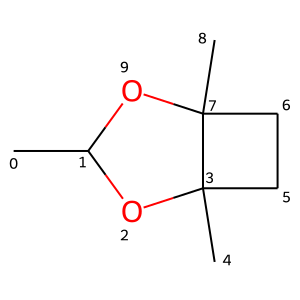

In [3]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

IPythonConsole.ipython_useSVG = True # < use SVGs instead of PNGs
IPythonConsole.drawOptions.addAtomIndices = True # adding indices
IPythonConsole.molSize = 300, 300

mol = MolFromSmiles('C[C@@H]1OC2(C)CCC2(C)O1')
mol

More common molecules obviously work just as well:

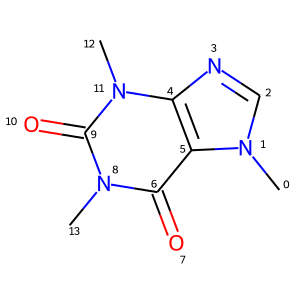

In [4]:
mol = MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C') # Caffeine
mol

## Molecule representation in the RDKit
Molecules are modeled using integer indexed atoms, starting at 0. We'll mostly just use methods and functions to get the atoms and their properties as well as the bonds and their properties.

First, let's have a look at the `GetAtoms()` method, it simply returns a sequence of all the atoms, we can convert it to a python list and get a list of `Atom` objects.

RDKit is at it's core a C++ application, and some functionality is implemented as methods on objects, and some as functions in libraries. We'll make use of a combination of both here. The important part is that we want to go from a RDKit molecule to our own graph representation.

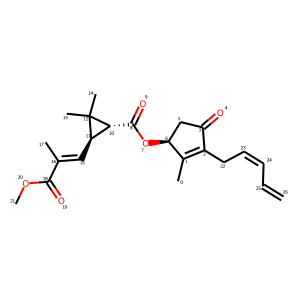

In [5]:
# Let's define a new molecule:
mol = MolFromSmiles(
    'CC1=C(C(=O)C[C@@H]1OC(=O)[C@@H]2[C@H](C2(C)C)/C=C(\C)/C(=O)OC)C/C=C\C=C') 
mol

In [ ]:
# We'll use GetAtoms and GetBonds to get the nodes and edges of our graph
atoms = mol.GetAtoms()
bonds = mol.GetBonds()

# Print one of each
print('atom:', list(atoms)[0])
print('bond:', list(bonds)[0])

atom: <rdkit.Chem.rdchem.Atom object at 0x7f9db63d9940>
bond: <rdkit.Chem.rdchem.Bond object at 0x7f9db63d9940>


As we can see, merely printing the entries of the atoms and bonds doesn't give us anything useful. Instead, we can call specific functions to get the information we need about the atoms and bonds:

In [6]:
# Atom features
atom = mol.GetAtoms()[0]
atom_symbol = str(atom.GetSymbol())
atom_valence = str(atom.GetExplicitValence())

# Bond features
bond = mol.GetBonds()[0]
bond_type = str(bond.GetBondType())
bond_aromatic = str(bond.GetIsAromatic())

# Print
print('atom symbol:', atom_symbol)
print('atom valence:', atom_valence)
print('bond type:', bond_type)
print('bond aromatic:', bond_aromatic)

atom symbol: C
atom valence: 1
bond type: SINGLE
bond aromatic: False


For convenience, we will define two functions to extract the features for our atoms and bonds (i.e., our nodes and edges): `get_atom_features` and `get_bond_features`. The objective of these is to return the features associated with each node, formatted in the representation we want to use for our graph neural network.

In [7]:
# Atom features
def get_atom_features(rd_atom):
  features = {'atom_symbol': str(rd_atom.GetSymbol()),
              'valence': str(rd_atom.GetExplicitValence())}
  return features

# Bond features
def get_bond_features(rd_bond):
  features = {'stereo': str(rd_bond.GetStereo()),
              'type': str(rd_bond.GetBondType()),
              'direction': str(rd_bond.GetBondDir()),
              'aromatic': str(rd_bond.GetIsAromatic())}
  return features

# Create dictionaries of the atoms and bonds in a molecule
def rdmol_to_graph(rd_mol):
  atoms = {rd_atom.GetIdx(): get_atom_features(rd_atom)
           for rd_atom in rd_mol.GetAtoms()}
  bonds = {frozenset((rd_bond.GetBeginAtomIdx(), rd_bond.GetEndAtomIdx())):
           get_bond_features(rd_bond) for rd_bond in rd_mol.GetBonds()}        
  return atoms, bonds

# Run it for our target molecule
atoms, bonds = rdmol_to_graph(mol)

# Print the outcome
print('atoms:')
for key, value in atoms.items():
  print(key, ':', value)
print()
print('bonds:')
for key, value in bonds.items():
  print(key, ':', value)

atoms:
0 : {'atom_symbol': 'C', 'valence': '1'}
1 : {'atom_symbol': 'C', 'valence': '4'}
2 : {'atom_symbol': 'C', 'valence': '4'}
3 : {'atom_symbol': 'C', 'valence': '4'}
4 : {'atom_symbol': 'O', 'valence': '2'}
5 : {'atom_symbol': 'C', 'valence': '2'}
6 : {'atom_symbol': 'C', 'valence': '4'}
7 : {'atom_symbol': 'O', 'valence': '2'}
8 : {'atom_symbol': 'C', 'valence': '4'}
9 : {'atom_symbol': 'O', 'valence': '2'}
10 : {'atom_symbol': 'C', 'valence': '4'}
11 : {'atom_symbol': 'C', 'valence': '4'}
12 : {'atom_symbol': 'C', 'valence': '4'}
13 : {'atom_symbol': 'C', 'valence': '1'}
14 : {'atom_symbol': 'C', 'valence': '1'}
15 : {'atom_symbol': 'C', 'valence': '3'}
16 : {'atom_symbol': 'C', 'valence': '4'}
17 : {'atom_symbol': 'C', 'valence': '1'}
18 : {'atom_symbol': 'C', 'valence': '4'}
19 : {'atom_symbol': 'O', 'valence': '2'}
20 : {'atom_symbol': 'O', 'valence': '2'}
21 : {'atom_symbol': 'C', 'valence': '1'}
22 : {'atom_symbol': 'C', 'valence': '2'}
23 : {'atom_symbol': 'C', 'valence': 

# Raw molecules to feature vectors

Finally, let's tie together what we've prepared so far!

## Embedding dimensionalities

The last piece of information we need to use this graph in a GNN is the dimensionality of categorical variables. This information is required to construct the embeddings (as discussed in the previous notebooks). While we could scan our dataset and count the occuring values (nuances) for all categorical variables, in this case we will use domain knowledge. In other words, we know which values the RDKit methods can return, and we'll use their count.

Often, we won't need all of these nuances. For example, we contruct embeddings for the full atom set, but the majority of atoms will not occur at all in the organic molecules we'll be using in this workshop. Thus, lots of embedding vectors will remain unused, and for these the network behaviour will be undefined. In practice this is rarely an issue.

## Let's wrap up

As discussed in the previous notebooks, we'll support both categorical and continuous features and. We'll first copy & paste the classes which handle the conversion from the raw data (e.g. python strings or RDKit enumeration) to integer encodings for the categorical variables. Note that these classes can be thought of as custom data types.



In [8]:
class CategoricalFeature:

  def __init__(self, name, values):
    self.name = name
    self.values = tuple(values)
    self.value_to_idx_mapping = {v: i for i, v in enumerate(values)}
    self.inv_value_to_idx_mapping = {i: v for v, i
                                     in self.value_to_idx_mapping.items()}
  
  def value_to_idx(self, value):
    return self.value_to_idx_mapping[value]
  
  def idx_to_value(self, idx):
    return self.inv_value_to_idx_mapping[idx]
  
  def __len__(self):
    return len(self.values)
  
  def __repr__(self):
    return f'<CategoricalFeature: {self.name}>'

  def __hash__(self):
    return hash((self.name, self.values))


class ContinuousFeature:
  
  def __init__(self, name):
    self.name = name

  def __repr__(self):
    return f'<ContinuousFeature: {self.name}>'

  def __hash__(self):
    return hash(self.name)

Next up, we define all variables (features) needed to represent an atom for our task. As mentioned earlier, we'll use the full set of Atoms represented in RDKit:

In [9]:
# Atom types
ATOM_SYMBOLS = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 
                'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 
                'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 
                'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 
                'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 
                'Ba', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 
                'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Rf', 'Db', 'Sg', 
                'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Fl', 'Lv', 'La', 'Ce',
                'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
                'Tm', 'Yb', 'Lu', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm',
                'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
SYMBOLS_FEATURE = CategoricalFeature('atom_symbol', ATOM_SYMBOLS)

# Aromaticity
AROMATIC_VALUES = [True, False]
AROMATIC_FEATURE = CategoricalFeature('is_aromatic', AROMATIC_VALUES)

# Explicit valance
EXPLICIT_VALANCE_FEATURE = ContinuousFeature('explicit_valance')

# Implicit valance
IMPLICIT_VALANCE_FEATURE = ContinuousFeature('implicit_valance')

# Combine all four into one list of features
ATOM_FEATURES = [SYMBOLS_FEATURE,
                 AROMATIC_FEATURE,
                 EXPLICIT_VALANCE_FEATURE,
                 IMPLICIT_VALANCE_FEATURE]

And now the same for bonds:

In [10]:
# Bond types
BOND_TYPES = ['UNSPECIFIED', 'SINGLE', 'DOUBLE', 'TRIPLE', 'QUADRUPLE', 
              'QUINTUPLE', 'HEXTUPLE', 'ONEANDAHALF', 'TWOANDAHALF',
              'THREEANDAHALF','FOURANDAHALF', 'FIVEANDAHALF', 'AROMATIC', 
              'IONIC', 'HYDROGEN', 'THREECENTER',	'DATIVEONE', 'DATIVE',
              'DATIVEL', 'DATIVER', 'OTHER', 'ZERO']
TYPE_FEATURE = CategoricalFeature('bond_type', BOND_TYPES)

# Bond directions
BOND_DIRECTIONS = ['NONE', 'BEGINWEDGE', 'BEGINDASH', 'ENDDOWNRIGHT',
                   'ENDUPRIGHT', 'EITHERDOUBLE' ]
DIRECTION_FEATURE = CategoricalFeature('bond_direction', BOND_DIRECTIONS)

# Bond, James Bond
BOND_STEREO = ['STEREONONE', 'STEREOANY', 'STEREOZ', 'STEREOE', 
               'STEREOCIS', 'STEREOTRANS']
STEREO_FEATURE = CategoricalFeature('bond_stereo', BOND_STEREO)

# Aromaticity
AROMATIC_VALUES = [True, False]
AROMATIC_FEATURE = CategoricalFeature('is_aromatic', AROMATIC_VALUES)

# Combine all four into one list of features
BOND_FEATURES = [TYPE_FEATURE,
                 DIRECTION_FEATURE,
                 AROMATIC_FEATURE,
                 STEREO_FEATURE]

Let's recall our dict-creating functions from above:

In [11]:
# Atom features
def get_atom_features(rd_atom):
  atom_symbol = rd_atom.GetSymbol()
  is_aromatic = rd_atom.GetIsAromatic()
  implicit_valance = float(rd_atom.GetImplicitValence())
  explicit_valance = float(rd_atom.GetExplicitValence())
  return {SYMBOLS_FEATURE: atom_symbol,
          AROMATIC_FEATURE: is_aromatic,
          EXPLICIT_VALANCE_FEATURE: explicit_valance,
          IMPLICIT_VALANCE_FEATURE: implicit_valance}

# Bond features
def get_bond_features(rd_bond):
  bond_type = str(rd_bond.GetBondType())
  bond_stereo_info = str(rd_bond.GetStereo())
  bond_direction = str(rd_bond.GetBondDir())
  is_aromatic = rd_bond.GetIsAromatic()
  return {TYPE_FEATURE: bond_type,
          DIRECTION_FEATURE: bond_direction,
          AROMATIC_FEATURE: is_aromatic,
          STEREO_FEATURE: bond_stereo_info}

# Create dictionaries of the atoms and bonds in a molecule
def rdmol_to_graph(rd_mol):
  atoms = {rd_atom.GetIdx(): get_atom_features(rd_atom)
           for rd_atom in rd_mol.GetAtoms()}
  bonds = {frozenset((rd_bond.GetBeginAtomIdx(), rd_bond.GetEndAtomIdx())):
           get_bond_features(rd_bond) for rd_bond in rd_mol.GetBonds()}        
  return atoms, bonds

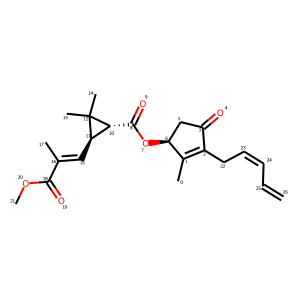

In [12]:
# Define target molecule
mol = MolFromSmiles(
    'CC1=C(C(=O)C[C@@H]1OC(=O)[C@@H]2[C@H](C2(C)C)/C=C(\C)/C(=O)OC)C/C=C\C=C') 
mol

In [13]:
# Run it for target molecule
atoms, bonds = rdmol_to_graph(mol)

# Print the outcome
print('atoms:')
for key, value in atoms.items():
  print(key, ':', value)
print()
print('bonds:')
for key, value in bonds.items():
  print(key, ':', value)

atoms:
0 : {<CategoricalFeature: atom_symbol>: 'C', <CategoricalFeature: is_aromatic>: False, <ContinuousFeature: explicit_valance>: 1.0, <ContinuousFeature: implicit_valance>: 3.0}
1 : {<CategoricalFeature: atom_symbol>: 'C', <CategoricalFeature: is_aromatic>: False, <ContinuousFeature: explicit_valance>: 4.0, <ContinuousFeature: implicit_valance>: 0.0}
2 : {<CategoricalFeature: atom_symbol>: 'C', <CategoricalFeature: is_aromatic>: False, <ContinuousFeature: explicit_valance>: 4.0, <ContinuousFeature: implicit_valance>: 0.0}
3 : {<CategoricalFeature: atom_symbol>: 'C', <CategoricalFeature: is_aromatic>: False, <ContinuousFeature: explicit_valance>: 4.0, <ContinuousFeature: implicit_valance>: 0.0}
4 : {<CategoricalFeature: atom_symbol>: 'O', <CategoricalFeature: is_aromatic>: False, <ContinuousFeature: explicit_valance>: 2.0, <ContinuousFeature: implicit_valance>: 0.0}
5 : {<CategoricalFeature: atom_symbol>: 'C', <CategoricalFeature: is_aromatic>: False, <ContinuousFeature: explicit_va

We now have a full representation of one graph (molecule), including the full feature vector. In the next notebook we'll learn how to use this in a GNN.

# Task 1

For the three example graphs illustrated below, produce similar python representations as we have done for the molecular graph. Use the `CategoricalFeatures` and `ContinuousFeature` classes. You are free to interpret the values of the graphs as you like.



## Graph 1
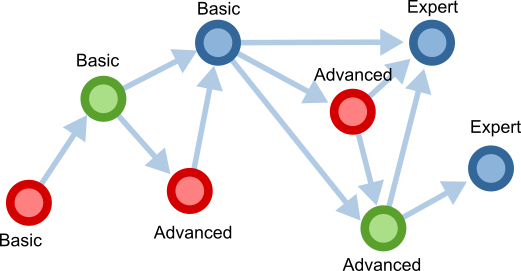

In [ ]:
# Create a graph representation below





CHALLENGE_NODE_FEATURES = [...]
CHALLENGE_EDGE_FEATURES = [...]

challenge_nodes = {...}
challenge_edges = {...}

## Graph 2
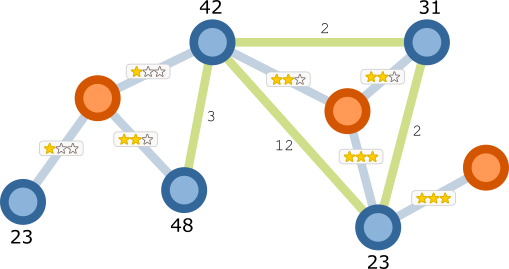

In [ ]:
# Create a graph representation below

REVIEW_NODE_FEATURES = [...]
REVIEW_EDGE_FEATURES = [...]

review_nodes = {...}
review_edges = {...} 

## Graph 3
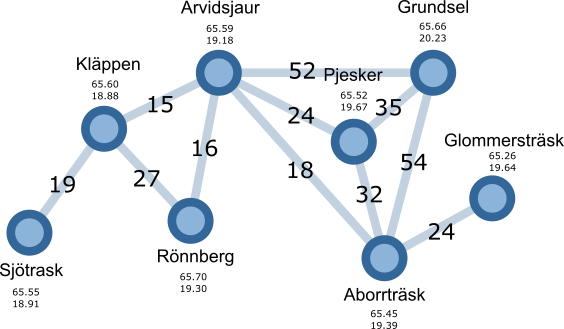

In [ ]:
# Create a graph representation below

TOWN_NODE_FEATURES = [...]
TOWN_EDGE_FEATURES = [...]

town_nodes = {...}
town_edges = {...}

# Task 2

 When we produced the final example of a full molecule represented as a graph, we made a few changes compared to the initial implementation. Can you spot them, and do you have an intuition for why we did this?

In [ ]:
### your answers here ###